In [ ]:
## Project Objective
This project explores relationships between Pokémon attributes (stats, types, and generations)
to understand what differentiates Legendary Pokémon from non-Legendary ones.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [15]:
Pokemon = pd.read_csv("https://raw.githubusercontent.com/Hiddensensu/PokemonData/main/Pokemon.csv")
Pokemon

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [24]:
Pokemon.loc[Pokemon["generation"] == 0, "generation"] = 7

Pokemon["type1"] = Pokemon["type1"].str.strip().str.title()
Pokemon["type2"] = Pokemon["type2"].str.strip().str.title()

gen_num = pd.to_numeric(Pokemon["generation"], errors="coerce")
assert gen_num.min() >= 1, "Invalid generation detected"

Pokemon["generation"] = gen_num.astype(int).astype("category")

Pokemon

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


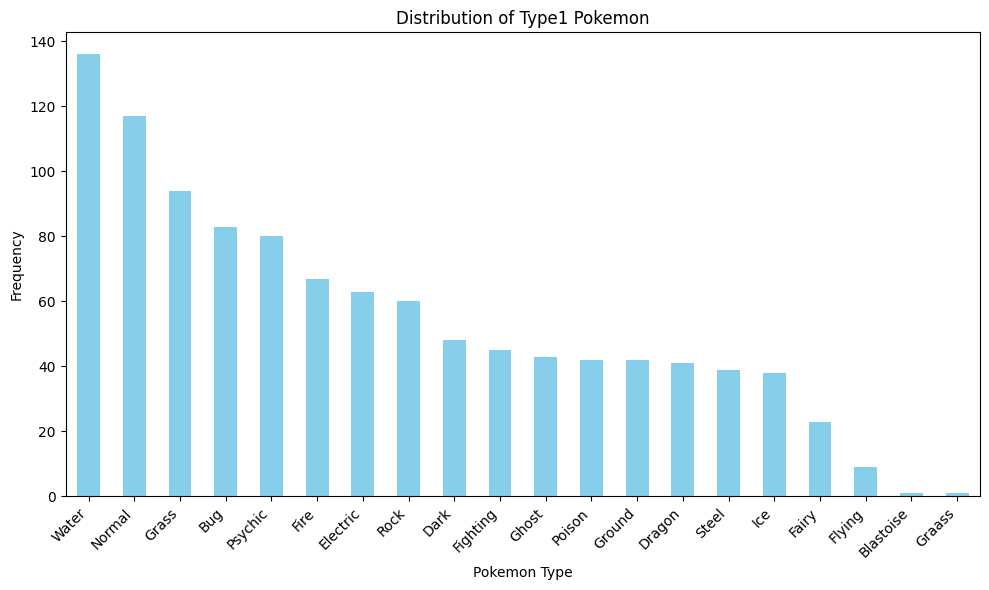

In [ ]:
plt.figure(figsize=(10, 6))
type1_counts.plot(kind='bar',
                  color='skyblue')
plt.title('Distribution of Type1 Pokemon')
plt.xlabel('Pokemon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\17185\AppData\Local\Temp\ipykernel_44996\1450950679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type2', y='hp', data=Pokemon, palette='Set2')


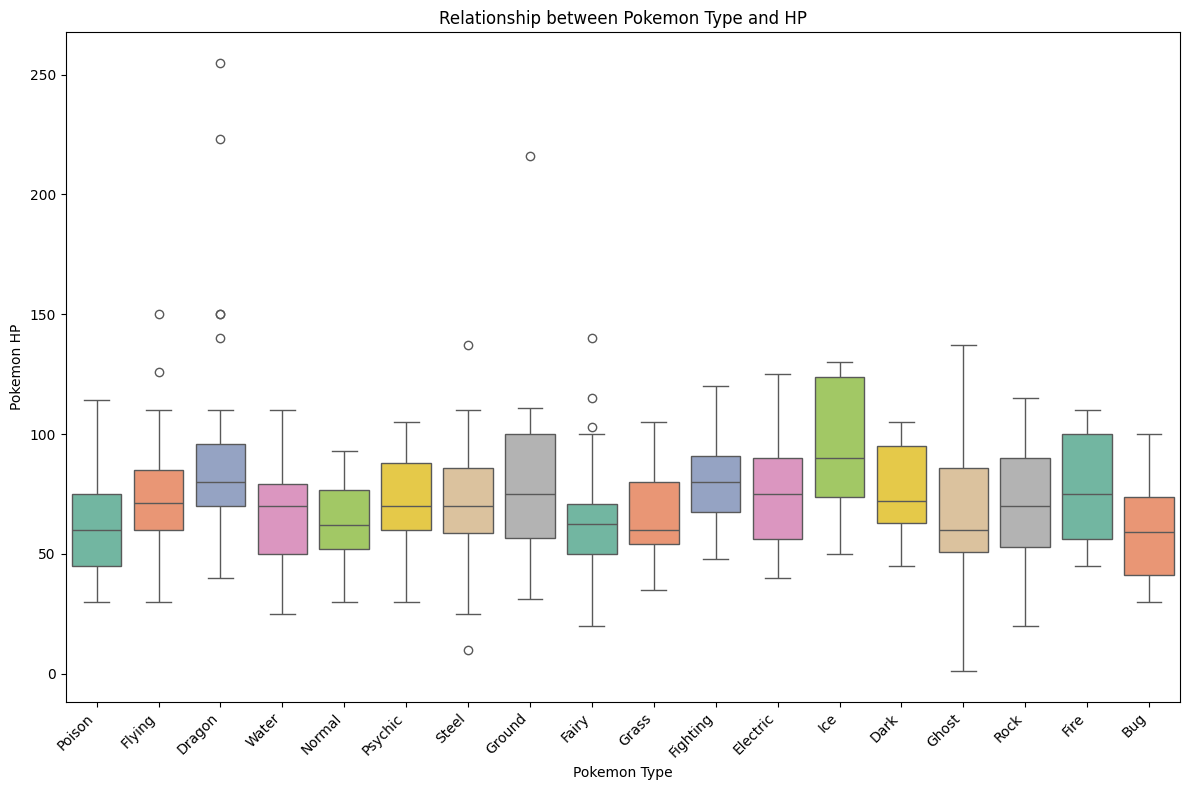

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='type2',
            y='hp',
            data=Pokemon, 
            palette='Set2')
plt.title('Relationship between Pokemon Type and HP')
plt.xlabel('Pokemon Type')
plt.ylabel('Pokemon HP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Attack vs Defense by Legendary Status')

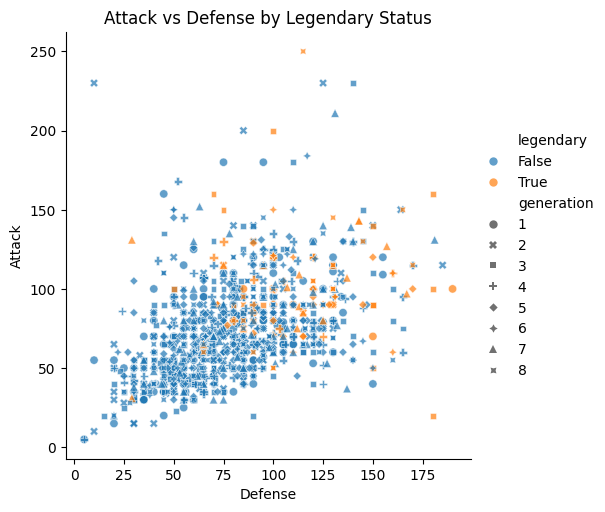

In [42]:
sns.relplot(x = "attack", 
            y = "defense", 
            style = "generation" ,
            hue = "legendary", 
            data = Pokemon,
            alpha = 0.7
            )
plt.xlabel("Defense")
plt.ylabel("Attack")
plt.title("Attack vs Defense by Legendary Status")

In [32]:
Pokemon.dtypes

number           int64
name            object
type1           object
type2           object
total            int64
hp               int64
attack           int64
defense          int64
sp_attack        int64
sp_defense       int64
speed            int64
generation    category
legendary         bool
dtype: object

In [33]:
stat_cols = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]

Pokemon[stat_cols].corr()

,hp,attack,defense,sp_attack,sp_defense,speed
hp,1.000000,0.455366,0.302501,0.361150,0.388298,0.176025
attack,0.455366,1.000000,0.460603,0.362070,0.260817,0.364312
defense,0.302501,0.460603,1.000000,0.219260,0.535930,0.003361
sp_attack,0.361150,0.362070,0.219260,1.000000,0.506912,0.436697
sp_defense,0.388298,0.260817,0.535930,0.506912,1.000000,0.219889
speed,0.176025,0.364312,0.003361,0.436697,0.219889,1.000000


Text(0.5, 1.0, 'Correlation Between Pokémon Stats')

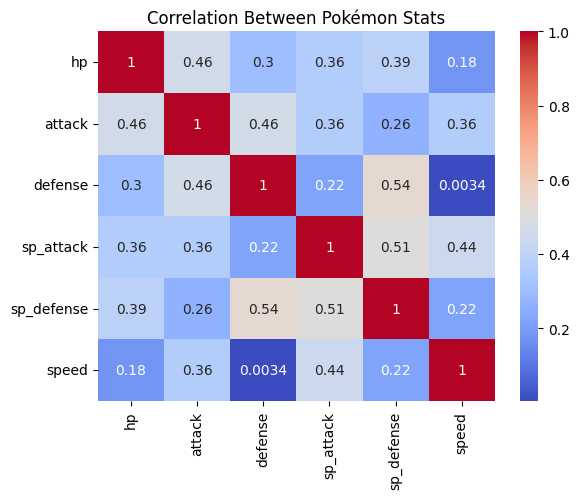

In [34]:
sns.heatmap(
    Pokemon[stat_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Pokémon Stats")

In [35]:
Pokemon.groupby("legendary")[stat_cols].mean()

,hp,attack,defense,sp_attack,sp_defense,speed
legendary,,,,,,
False,67.322851,77.020964,71.887841,68.677149,68.935010,65.093291
True,96.067797,112.610169,99.872881,110.432203,101.110169,98.703390


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'hp'),
  Text(1, 0, 'attack'),
  Text(2, 0, 'defense'),
  Text(3, 0, 'sp_attack'),
  Text(4, 0, 'sp_defense'),
  Text(5, 0, 'speed')])

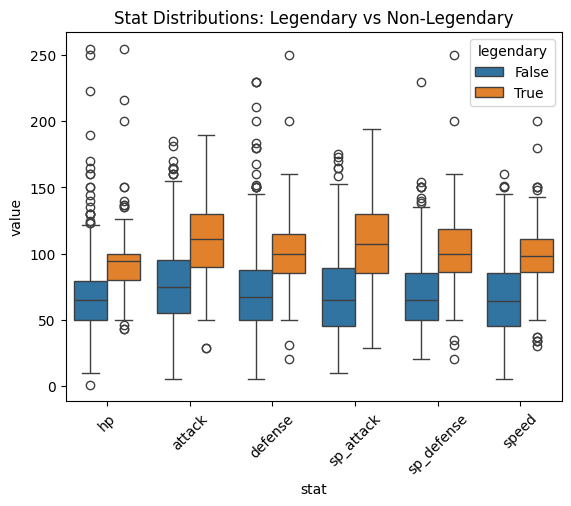

In [36]:
Pokemon_melt = Pokemon.melt(
    id_vars="legendary",
    value_vars=stat_cols,
    var_name="stat",
    value_name="value"
)

sns.boxplot(
    x="stat",
    y="value",
    hue="legendary",
    data=Pokemon_melt
)
plt.title("Stat Distributions: Legendary vs Non-Legendary")
plt.xticks(rotation=45)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

X = Pokemon[stat_cols]
y = Pokemon["legendary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       287
        True       0.77      0.49      0.60        35

    accuracy                           0.93       322
   macro avg       0.86      0.73      0.78       322
weighted avg       0.92      0.93      0.92       322

ROC AUC: 0.9721254355400696


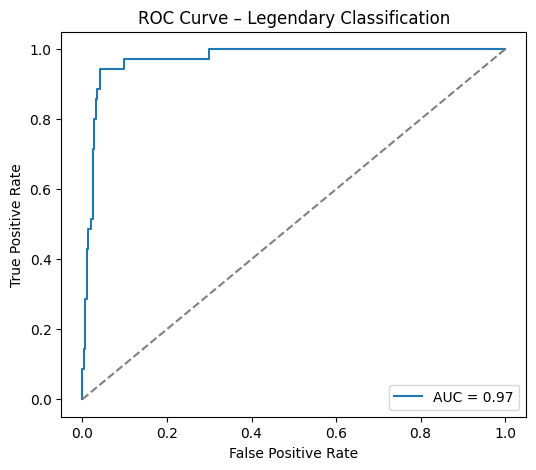

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Legendary Classification")
plt.legend()
plt.show()

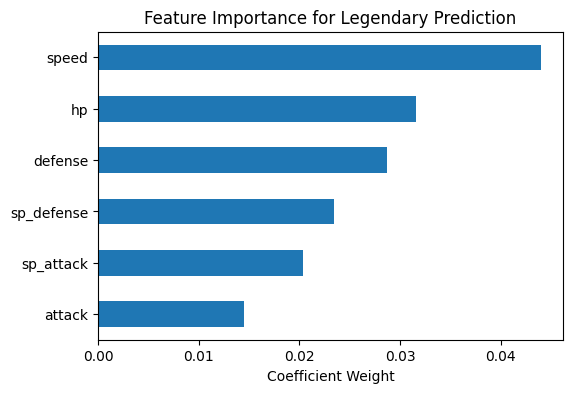

In [46]:
importance = pd.Series(
    model.coef_[0],
    index=stat_cols
).sort_values()

importance.plot(kind="barh", figsize=(6, 4))
plt.title("Feature Importance for Legendary Prediction")
plt.xlabel("Coefficient Weight")
plt.show()

In [ ]:
## Special Attack and Speed were the strongest predictors of Legendary status.

In [40]:
from scipy.stats import ttest_ind

legendary = Pokemon[Pokemon["legendary"] == True]["attack"]
non_legendary = Pokemon[Pokemon["legendary"] == False]["attack"]

ttest_ind(legendary, non_legendary, equal_var=False)

TtestResult(statistic=11.815616377670842, pvalue=4.757084584311821e-23, df=146.510640313537)

In [ ]:
## pvalue ≈ 4.7e-23

## The t-test confirms that Legendary Pokémon have significantly higher Attack stats
(p < 0.001), supporting the visual and model-based findings.

In [ ]:
## Key Takeaways

- Legendary Pokémon consistently outperform non-Legendary Pokémon across offensive and speed-related stats
- Defensive stats show overlap, suggesting Legendary status is not purely defensive
- A logistic regression model using base stats achieved strong predictive performance
- Special Attack and Speed were the most influential features in identifying Legendary Pokémon